## FOOTBALL DATA ANALYSIS
*************************************************

### **INTRODUCTION**
********************************************************

#### **GOAL**
<br> These days data analysis is an essential part of technologies and other industries, observations of collected data provide the opportunity to understand user habits and inprove performance of technology as well as to discover ideas for the future. According to [Statista](https://www.statista.com/topics/1740/sports-betting/#dossierContents__outerWrapper) sports betting and lotery market value exceeds 190 billion US dollars, consequently, both businesses and users are keen to understand peculiarities of the field in order to gain some profit. The purpose of this project was to **get deeper perception of betting on soccer as a potential business opportunity by analysing given data as well as to predict outcome of football match using statistical modeling .**

#### **APPROACH**
Analysis of data was conducted following provided questions:
* Which leagues are in which countries?
* Which leagues score the most/fewest goals?
* Who are the top scorers in each team and league?
* Is there such a thing as home advantage?
* Can we predict how many goals each team will score in each match?
* Can we predict which team will win the match?

#### **DATA USED**
<br>[Ultimate 25k+ Matches Football Database -European Dataset](https://www.kaggle.com/datasets/prajitdatta/ultimate-25k-matches-football-database-european) from Kaggle containing data about soccer matches of 11 European countries from seasons 2008 to 2016.

------------------------
### IMPORTING PACKAGES AND DATA LOADING
-------------------------------------

In [959]:
import pandas as pd
import numpy as np
import sqlite3 as sql

conn = sql.connect("database.sqlite")
import duckdb as ddb

# For visualisations
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib as mpl

# For statistical analysis
import statsmodels.api as sm
from scipy.stats import chisquare
from sklearn.multioutput import MultiOutputClassifier

# For display of multiple variables
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# For working with XML data
import xml.etree.ElementTree as ET

import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegressionCV,
    LogisticRegression,
    ElasticNetCV,
)
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# properties of plots
color = "#115396"
font = "Cambria"
alpha = 0.5

<IPython.core.display.Javascript object>

Loading and preview of data:

In [960]:
country_data = pd.read_sql_query("SELECT * FROM Country", conn)
league_data = pd.read_sql_query("SELECT * FROM League", conn)
match_data = pd.read_sql_query("SELECT * FROM Match", conn)
player_data = pd.read_sql_query("SELECT * FROM Player", conn)
player_attributes_data = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
team_data = pd.read_sql_query("SELECT * FROM Team", conn)
team_attributes_data = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)

<IPython.core.display.Javascript object>

In [961]:
print("Table of countries:")
country_data.head(3)
print("Table of leagues:")
league_data.head(3)
print("Table of matches:")
match_data.head(3)
print("Table of players:")
player_data.head(3)
print("Table of players' attributes:")
player_attributes_data.head(3)
print("Table of teams:")
team_data.head(3)
print("Table of teams' attributes:")
team_attributes_data.head(3)

Table of countries:


,id,name
0,1,Belgium
1,1729,England
2,4769,France


Table of leagues:


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1


Table of matches:


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


Table of players:


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


Table of players' attributes:


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


Table of teams:


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL


Table of teams' attributes:


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


<IPython.core.display.Javascript object>

Exploratory data analysis will be focused on tables with *Match, Players and Player Attributes* data.
<br>It was decided to perform missing data and outliers inspection for each table individually through the project.

***********************************
### DATA EXPLORATION AND CLEANING
***************************************

#### Q1. Which leagues are in which countries?

In [962]:
print("Table of coutries:")
country_data.info()
print("\n\nTable of leagues:")
league_data.info()

Table of coutries:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


Table of leagues:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


<IPython.core.display.Javascript object>

In [963]:
country_league_data = pd.read_sql_query(
    """SELECT c.id AS country_id, c.name AS country_name, l.id AS league_id, l.name AS league_name
                                        FROM Country AS c LEFT JOIN League AS l ON c.id = l.country_id""",
    conn,
)

country_league_data[["country_name", "league_name"]]

,country_name,league_name
0,Belgium,Belgium Jupiler League
1,England,England Premier League
2,France,France Ligue 1
3,Germany,Germany 1. Bundesliga
4,Italy,Italy Serie A
5,Netherlands,Netherlands Eredivisie
6,Poland,Poland Ekstraklasa
7,Portugal,Portugal Liga ZON Sagres
8,Scotland,Scotland Premier League
9,Spain,Spain LIGA BBVA


<IPython.core.display.Javascript object>

#### Q2. Which leagues score the most/fewest goals?

Missing data inspection for *Match* table:

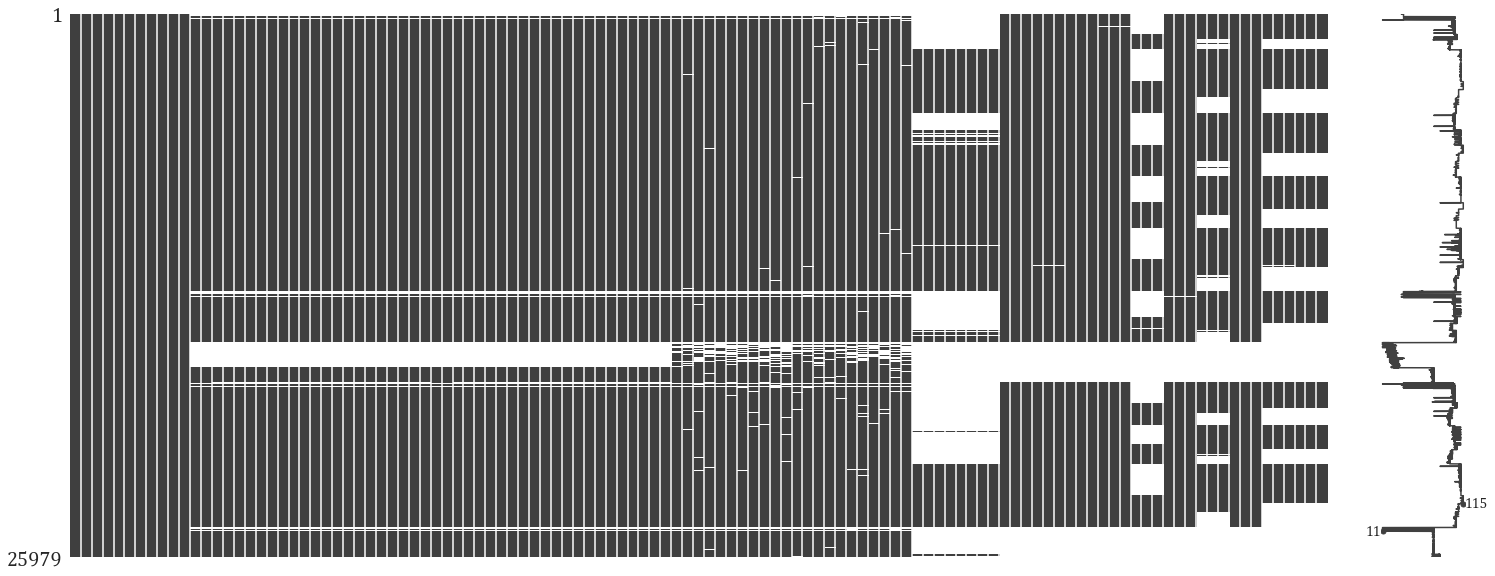

<IPython.core.display.Javascript object>

In [964]:
msno.matrix(match_data)

It can be seen that some columns has missing values, for this particular question only columns *home_team_goal, away_team_goal* and *season* will be used, so let's check those:

In [965]:
match_data[["home_team_goal", "away_team_goal", "season"]].isnull().mean()

home_team_goal    0.0
away_team_goal    0.0
season            0.0
dtype: float64

<IPython.core.display.Javascript object>

In [966]:
total_goals_leagues = pd.read_sql_query(
    """SELECT m.league_id, l.name, SUM(m.home_team_goal + m.away_team_goal) AS total_goals
                    FROM League AS l JOIN Match AS m ON l.id = m.league_id
                    GROUP BY 1
                    ORDER BY total_goals DESC""",
    conn,
)

total_goals_leagues

,league_id,name,total_goals
0,21518,Spain LIGA BBVA,8412
1,1729,England Premier League,8240
2,10257,Italy Serie A,7895
3,13274,Netherlands Eredivisie,7542
4,4769,France Ligue 1,7427
5,7809,Germany 1. Bundesliga,7103
6,17642,Portugal Liga ZON Sagres,5201
7,1,Belgium Jupiler League,4841
8,19694,Scotland Premier League,4804
9,15722,Poland Ekstraklasa,4656


<IPython.core.display.Javascript object>

Assuming that data provided contains records of every match of every league for the period of time from 2008 to 2016, leagues of Spain, England and Italy have the highest number of total goals.
<br>Let's see how number of goals changed through seasons:

In [967]:
goals_per_season = pd.read_sql_query(
    """SELECT m.league_id, l.name, m.season, SUM(m.home_team_goal + m.away_team_goal) AS total_goals
                    FROM League AS l JOIN Match AS m ON l.id = m.league_id
                    GROUP BY league_id, season""",
    conn,
)

goals_per_season.groupby("name").agg(goals_avg=("total_goals", "mean")).sort_values(
    by="goals_avg", ascending=False
)

,goals_avg
name,
Spain LIGA BBVA,1051.500
England Premier League,1030.000
Italy Serie A,986.875
Netherlands Eredivisie,942.750
France Ligue 1,928.375
Germany 1. Bundesliga,887.875
Portugal Liga ZON Sagres,650.125
Belgium Jupiler League,605.125
Scotland Premier League,600.500


<IPython.core.display.Javascript object>

The average amount of goals keeps the same tendency as the total.

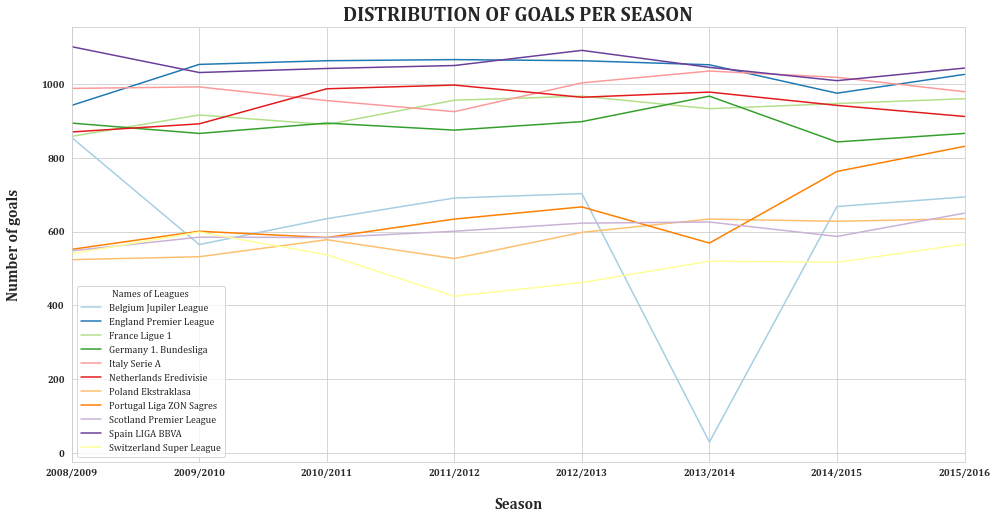

<IPython.core.display.Javascript object>

In [968]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(
    y=goals_per_season["total_goals"],
    x=goals_per_season.season,
    hue=goals_per_season["name"],
    palette="Paired",
)

plt.xlabel("Season", size=15, labelpad=20, fontweight="bold", fontname=font)
plt.ylabel("Number of goals", size=15, labelpad=20, fontweight="bold", fontname=font)
plt.title("DISTRIBUTION OF GOALS PER SEASON", size=20, weight="bold", fontname=font)
plt.yticks(fontweight="bold", fontname=font)
plt.xticks(fontweight="bold", fontname=font)
ax.set_xlim("2008/2009", "2015/2016")

# legend
plt.legend(title="Names of Leagues")
mpl.rc("font", family="Cambria")

Tendencies are quite clear for each league, exept for Belgium Jupiter League, which had extremely low amount of goals for the season 2013/2014.

In [969]:
len(
    match_data[((match_data["league_id"] == 1) & (match_data["season"] == "2013/2014"))]
)

12

<IPython.core.display.Javascript object>

It was found that there is an exiguous amount of records for Belgium Jupyter league for the season of 2013/2014.

#### Analysis of players data

In [970]:
player_data.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


<IPython.core.display.Javascript object>

In [971]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


<IPython.core.display.Javascript object>

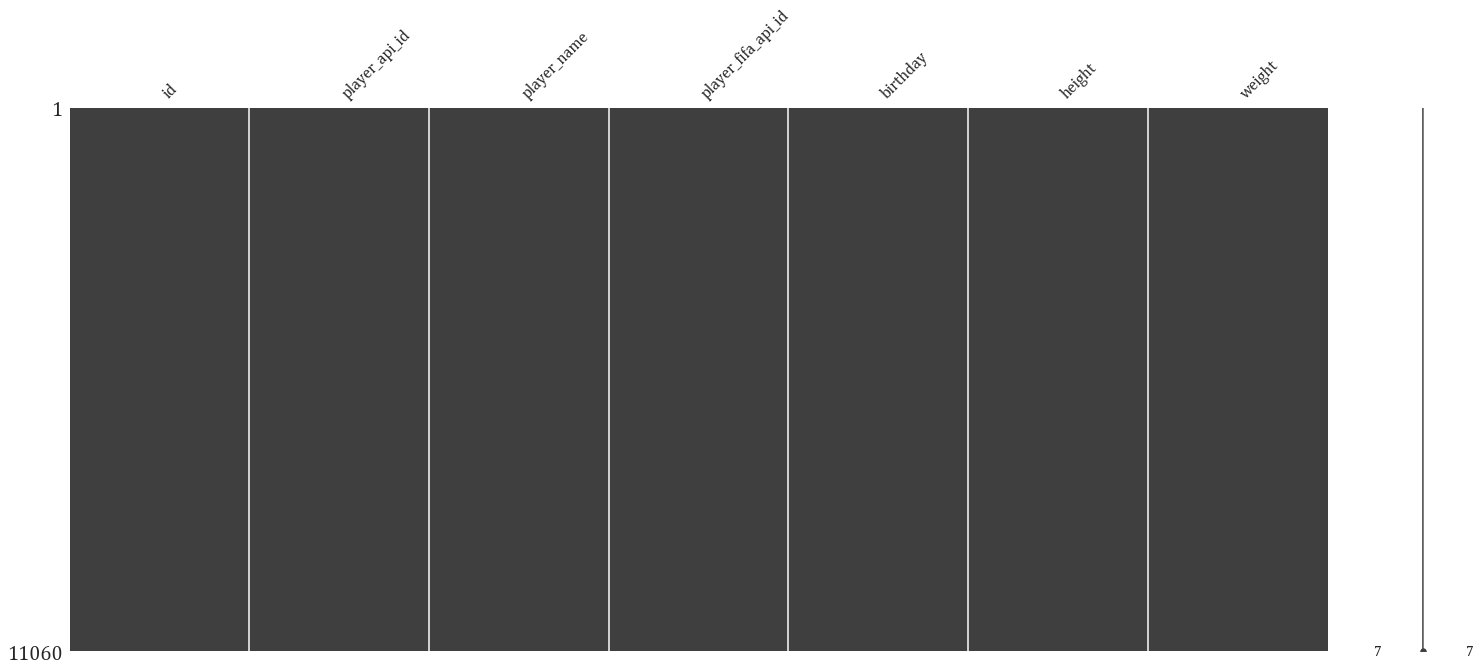

<IPython.core.display.Javascript object>

In [972]:
msno.matrix(player_data)

In [973]:
# checking for duplicated values
player_data.duplicated(subset=["player_name", "birthday"]).sum()

0

<IPython.core.display.Javascript object>

This table contains data about player's *id, birthday and physical parameters of the body*.
<br>There is no missing data or duplicates in this table.

In [974]:
# droping unnecessary clomuns
player_data = player_data.drop(columns=["id", "player_fifa_api_id"])

player_data.head()

,player_api_id,player_name,birthday,height,weight
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
2,162549,Aaron Doran,1991-05-13 00:00:00,170.18,163
3,30572,Aaron Galindo,1982-05-08 00:00:00,182.88,198
4,23780,Aaron Hughes,1979-11-08 00:00:00,182.88,154


<IPython.core.display.Javascript object>

It was decided to only year of birth for analysis:

In [975]:
player_data["birthday"] = pd.DatetimeIndex(player_data["birthday"]).year

<IPython.core.display.Javascript object>

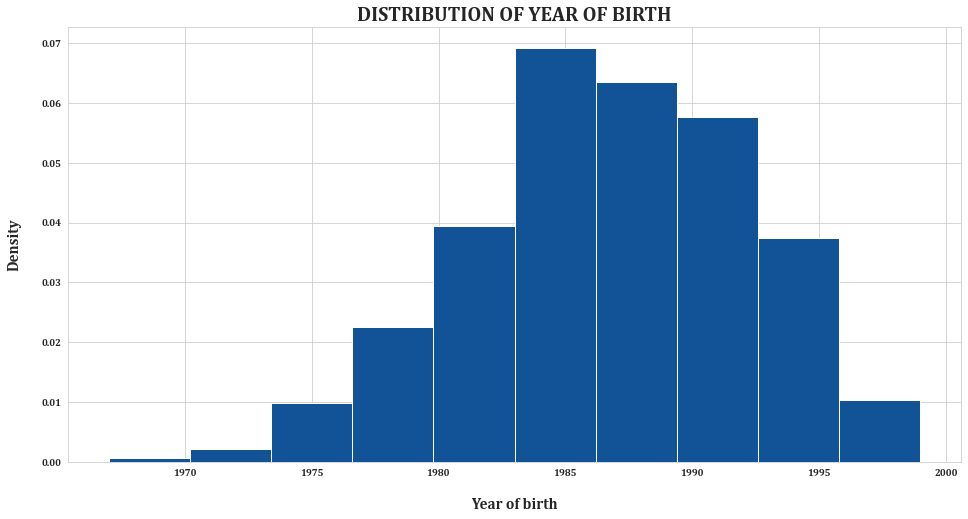

<IPython.core.display.Javascript object>

In [976]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.hist(player_data["birthday"], color=color, bins=10, density=True)
plt.xlabel("Year of birth", size=15, labelpad=20, fontweight="bold", fontname=font)
plt.ylabel("Density", size=15, labelpad=20, fontweight="bold", fontname=font)
plt.title("DISTRIBUTION OF YEAR OF BIRTH", size=20, weight="bold", fontname=font)
plt.yticks(fontweight="bold", fontname=font)
plt.xticks(fontweight="bold", fontname=font)
sns.set_style("whitegrid")

In [977]:
pd.DataFrame(round(player_data["birthday"].describe(), 2)).T

,count,mean,std,min,25%,50%,75%,max
birthday,11060.0,1986.64,5.48,1967.0,1983.0,1987.0,1991.0,1999.0


<IPython.core.display.Javascript object>

Most of players were born between 1983 and 1991. The oldest player was born in 1967, so, even if he had played in  season of 2008, he was 41 year old, which is a lot in proffesional sports. The youngest player could have been less than 17 years old. However, conclusions about player's age cannot be made, because it is not clear, when did they play in this 8 year period that data has covered.

In order to take analysis further physical body parameters will be oberved:

In [978]:
# converting weight from lb to kg
player_data["weight"] = player_data["weight"] * 0.45359237

<IPython.core.display.Javascript object>

In [979]:
round(player_data[["height", "weight"]].describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
height,11060.0,181.87,6.37,157.48,177.80,182.88,185.42,208.28
weight,11060.0,76.38,6.80,53.07,72.12,76.20,81.19,110.22


<IPython.core.display.Javascript object>

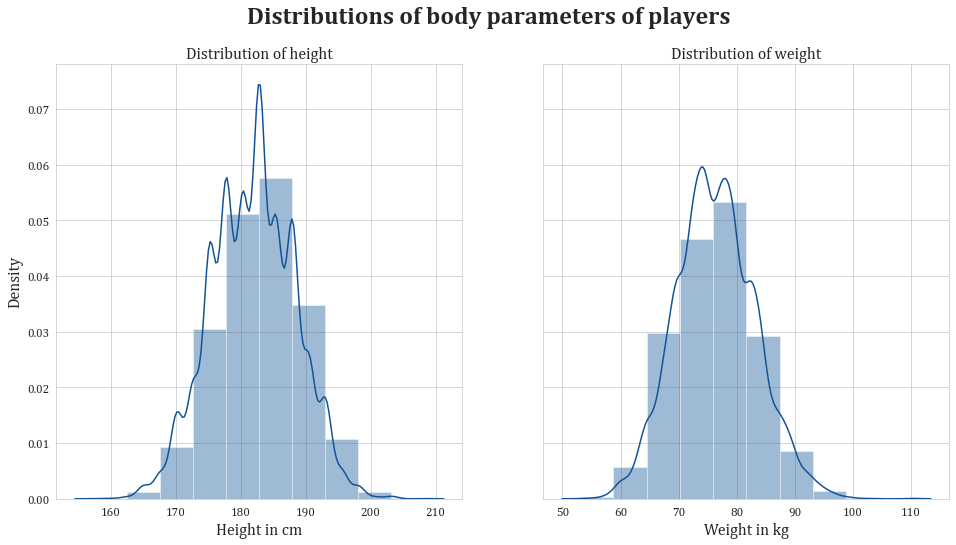

<IPython.core.display.Javascript object>

In [980]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 8))

f.suptitle(
    f"Distributions of body parameters of players",
    fontsize=24,
    weight="bold",
    fontname=font,
)

# ax1 subplot
sns.distplot(player_data["height"], hist=True, kde=True, ax=ax1, bins=10, color=color)
ax1.set_title("Distribution of height", fontsize=16, fontname=font)
ax1.set_ylabel("Density", fontsize=16, fontname=font)
ax1.set_xlabel("Height in cm", fontname=font, fontsize=16)
plt.setp(ax1.get_xticklabels(), fontsize=12, fontname=font)
plt.setp(ax1.get_yticklabels(), fontsize=12, visible=True, fontname=font)

# ax2 subplot
sns.distplot(player_data["weight"], hist=True, kde=True, ax=ax2, bins=10, color=color)
ax2.set_title("Distribution of weight", fontsize=16, fontname=font)
ax2.set_xlabel("Weight in kg", fontname=font, fontsize=16)
plt.setp(ax2.get_xticklabels(), fontsize=12, fontname=font)

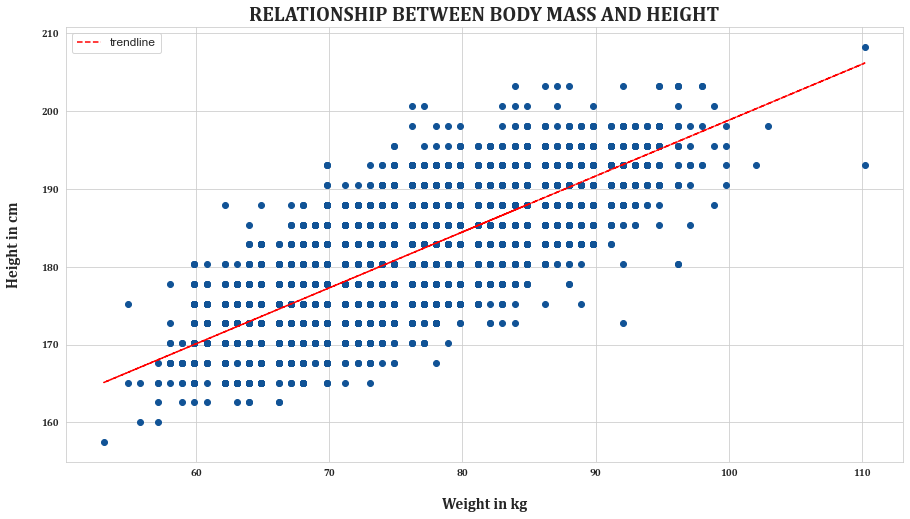

<IPython.core.display.Javascript object>

In [981]:
x = player_data["weight"]
y = player_data["height"]

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x, y, color=color)

# display of trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", label="trendline")

# parameters of plot
plt.xlabel("Weight in kg", size=15, labelpad=20, fontweight="bold", fontname=font)
plt.ylabel("Height in cm", size=15, labelpad=20, fontweight="bold", fontname=font)
plt.title(
    "RELATIONSHIP BETWEEN BODY MASS AND HEIGHT",
    size=20,
    weight="bold",
    fontname=font,
)
plt.yticks(fontweight="bold", fontname=font)
plt.xticks(fontweight="bold", fontname=font)

# legend
ax.legend(fontsize=12)

The average **height** of soccer player is almost 182 cm. The height ranges from 157.48 cm to 208.28 cm, which creates more than 50 cm gap between lowest and tallest sportsman. However, most of players have height between 177 and 185 centimetres.
<br>
<br>The average **weight** of soccer player is 76.4 kg, this parameters ranges form 53 to 110 kg. Most of players have weight between 72 and 81 kg.
<br>
<br>From the plot above, it may be seen that there is positive relationship between mass and height parameters.
<br>
<br>To conclude, physical parameters of sportsman have vast variety, which might be useful for different positions of players. Unfortunately, there is no such information provided in this dataset.

It was decided to combine mass and height of players and calculate Body Mass Index:

In [982]:
player_data["BMI"] = round(
    player_data["weight"] / (player_data["height"] / 100) ** 2, 2
)

pd.DataFrame(round(player_data["BMI"].describe(), 2)).T

,count,mean,std,min,25%,50%,75%,max
BMI,11060.0,23.07,1.32,17.59,22.17,23.06,23.87,30.87


<IPython.core.display.Javascript object>

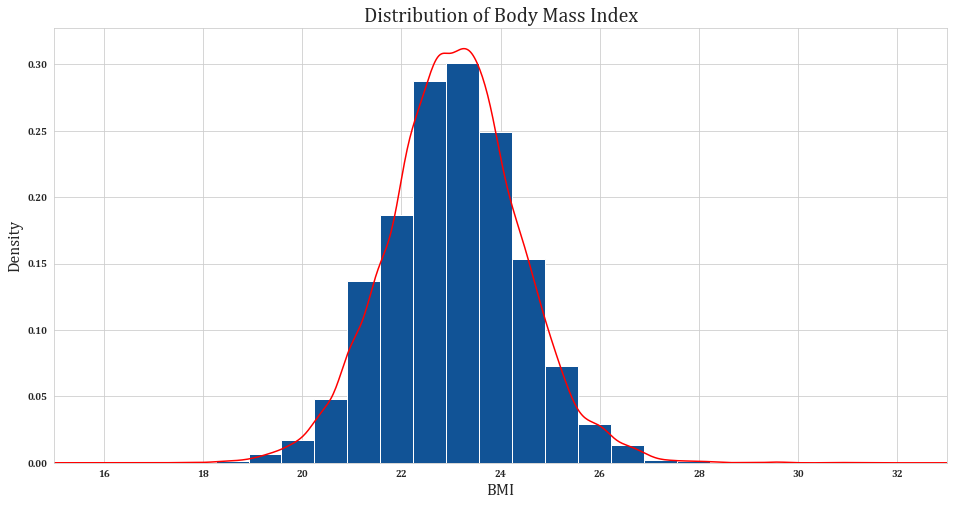

<IPython.core.display.Javascript object>

In [983]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.hist(player_data["BMI"], bins=20, density=True, color=color)
bbb = player_data["BMI"].plot.kde(color="r")
ax.set_title("Distribution of Body Mass Index", fontsize=20, fontname=font)
ax.set_ylabel("Density", fontsize=16, fontname=font)
ax.set_xlabel("BMI", fontname=font, fontsize=16)
plt.yticks(fontweight="bold", fontname=font)
plt.xticks(fontweight="bold", fontname=font)
sns.set_style("whitegrid")
ax.set_xlim(15, 33)

For adults 20 year and older, BMI between 18.5 and 24.9 is considered to be healthy weight, with lower BMI indicating underweight person and higher BMI meaning obesity. However, interpretation and accuracy of BMI was the bone of contention for some time, especially, when talking about sportsman.
<br>Anyway, it may be seen that most of sportman fits into range of healthy person with rare deviations.

#### Q3. Who are the top scorers in each team and league?

In [984]:
match_data = pd.read_sql_query("SELECT * FROM Match", conn)

<IPython.core.display.Javascript object>

In [985]:
# checking for duplicated rows
match_data.duplicated().any().sum()

0

<IPython.core.display.Javascript object>

The column *goal* contains meta data about goals of the match like the player and team, who scored, type of the goal, ect.
<br>It was a challenge to understand this data because it is in XML format.

In [986]:
goal_missing = round(match_data["goal"].isnull().mean(), 3)

print("Proportion of missing data in 'goal' column: ", goal_missing)

Proportion of missing data in 'goal' column:  0.453


<IPython.core.display.Javascript object>

It was decided to inspect, which leagues have more missing data in the column *goal*. This information may be useful for futher interpretation of data.

In [987]:
# missing values in the 'goal' column

missing_values = (
    match_data.loc[match_data["goal"].isnull()]
    .groupby("country_id")
    .agg(Missing_goal_values=("country_id", "count"))
)

not_missing_values = (
    match_data.loc[match_data["goal"].notnull()]
    .groupby("country_id")
    .agg(Not_missing_goal_values=("country_id", "count"))
)

<IPython.core.display.Javascript object>

In [988]:
match_miss_val = (
    league_data.merge(
        missing_values, how="outer", left_on="country_id", right_index=True
    )
    .merge(not_missing_values, how="outer", left_on="country_id", right_index=True)
    .replace(np.nan, 0)
)

match_miss_val[["name", "Missing_goal_values", "Not_missing_goal_values"]].sort_values(
    by="Missing_goal_values"
)

,name,Missing_goal_values,Not_missing_goal_values
1,England Premier League,0.0,3040.0
3,Germany 1. Bundesliga,0.0,2448.0
9,Spain LIGA BBVA,1.0,3039.0
4,Italy Serie A,3.0,3014.0
2,France Ligue 1,1014.0,2026.0
10,Switzerland Super League,1322.0,100.0
0,Belgium Jupiler League,1728.0,0.0
8,Scotland Premier League,1811.0,13.0
6,Poland Ekstraklasa,1913.0,7.0
5,Netherlands Eredivisie,1918.0,530.0


<IPython.core.display.Javascript object>

It can be seen that only leagues of England and Germany have no missing values in this column.
<br>On the contrary, leagues of Belgium and Portugal have no information in this column.

Creating new table with data from *goal* column:

In [989]:
# getting index of rows containing data about goals of match

goal_index = list(match_data["goal"][match_data["goal"].notna()].index)

# empty list for extracted information
results = []

# extracting values of league id, team, goal type and player, who scored
# appending values to list of results
for i in goal_index:
    league = match_data["league_id"].loc[i]
    match = match_data["match_api_id"].loc[i]

    root = ET.fromstring(match_data["goal"].loc[i])
    players = root.findall(".//player1")
    teams = root.findall(".//team")
    g_types = root.findall(".//goal_type")

    for i in range(len(players)):
        player = players[i].text
        team = teams[i].text
        g_type = g_types[i].text
        results.append([league, match, player, team, g_type])


# converting results to data frame
goal_data = pd.DataFrame(
    results, columns=["league_id", "match_id", "player1_id", "team_id", "goal_type"]
)

goal_data.head()

,league_id,match_id,player1_id,team_id,goal_type
0,1729,489042,37799,10261,n
1,1729,489042,24148,10260,n
2,1729,489043,26181,9825,n
3,1729,489044,30853,8650,n
4,1729,489045,23139,8654,n


<IPython.core.display.Javascript object>

#### Top scorers

In [990]:
top_scorer_players = ddb.query(
    """SELECT  g.player1_id AS player_id,
                    p.player_name,
                    COUNT(g.player1_id) AS goals 
                    FROM goal_data AS g
                    LEFT JOIN player_data AS p
                    ON g.player1_id = p.player_api_id
                    GROUP BY 1, 2
                    ORDER by 3 DESC"""
).to_df()

top_scorer_players[["player_name", "goals"]].head(10)

,player_name,goals
0,Lionel Messi,295
1,Cristiano Ronaldo,290
2,Zlatan Ibrahimovic,207
3,Gonzalo Higuain,174
4,Edinson Cavani,168
5,Sergio Aguero,156
6,Antonio Di Natale,156
7,Luis Suarez,136
8,Wayne Rooney,135
9,Robin van Persie,124


<IPython.core.display.Javascript object>

#### Top scorers in each team

In [991]:
top_scorer_teams = ddb.query(
    """SELECT t.team_long_name AS team_name,
                    g.team_id,
                    p.player_name,
                    g.player1_id AS player_id,
                    COUNT(g.player1_id) AS goals 
                    FROM goal_data AS g
                    LEFT JOIN player_data AS p
                    ON g.player1_id = p.player_api_id
                    LEFT JOIN team_data AS t
                    ON t.team_api_id = g.team_id
                    GROUP BY 1, 2, 3, 4
                    ORDER BY 5 DESC
                    """
).to_df()

top_scorer_teams = (
    top_scorer_teams.groupby(["team_name", "team_id"])
    .first()
    .sort_values(by="goals", ascending=False)
    .reset_index()
)

top_scorer_teams[["team_name", "player_name", "goals"]].head(10)

,team_name,player_name,goals
0,FC Barcelona,Lionel Messi,295
1,Real Madrid CF,Cristiano Ronaldo,269
2,Udinese,Antonio Di Natale,156
3,Manchester United,Wayne Rooney,135
4,Paris Saint-Germain,Zlatan Ibrahimovic,120
5,Bayer 04 Leverkusen,Stefan Kiessling,112
6,Manchester City,Sergio Aguero,105
7,FC Bayern Munich,Thomas Mueller,94
8,FC Schalke 04,Klaas Jan Huntelaar,88
9,Napoli,Edinson Cavani,85


<IPython.core.display.Javascript object>

Same names may be seen in this table as well.

In [992]:
top_scorer_teams.shape

(199, 5)

<IPython.core.display.Javascript object>

In [993]:
len(top_scorer_teams["player_id"].unique())

194

<IPython.core.display.Javascript object>

Judging from shape of data frames, some players played in more one team.

In [1045]:
top_scorer_teams["player_id"].duplicated().sum()

5

<IPython.core.display.Javascript object>

In [1046]:
# ids of players, who played in more one team
top_scorer_teams["player_id"][top_scorer_teams["player_id"].duplicated()]

52     46700
76     37506
107    41294
154    39311
155    91560
Name: player_id, dtype: object

<IPython.core.display.Javascript object>

In [1049]:
top_scorer_teams[top_scorer_teams["player_id"] == "37506"]

,team_name,team_id,player_name,player_id,goals
29,Valencia CF,10267,Roberto Soldado,37506,59
76,Getafe CF,8305,Roberto Soldado,37506,29


<IPython.core.display.Javascript object>

#### Top scorers in each league

In [994]:
top_scorer_leagues = ddb.query(
    """SELECT l.name AS league_name,
                    g.league_id,
                    p.player_name,
                    g.player1_id AS player_id,
                    COUNT(g.player1_id) AS goals 
                    FROM goal_data AS g
                    LEFT JOIN player_data AS p
                    ON g.player1_id = p.player_api_id
                    LEFT JOIN league_data AS l
                    ON l.id = g.league_id
                    GROUP BY 1, 2, 3, 4
                    ORDER BY 5 DESC
                    """
).to_df()

top_scorer_leagues.groupby(["league_name", "league_id"]).first().sort_values(
    by="goals", ascending=False
)

,,player_name,player_id,goals
league_name,league_id,,,
Spain LIGA BBVA,21518,Lionel Messi,30981,295
Italy Serie A,10257,Antonio Di Natale,27734,156
England Premier League,1729,Wayne Rooney,30829,135
Germany 1. Bundesliga,7809,Robert Lewandowski,93447,124
France Ligue 1,4769,Zlatan Ibrahimovic,35724,120
Netherlands Eredivisie,13274,Luuk de Jong,150201,47
Switzerland Super League,24558,Guillaume Hoarau,37554,17
Scotland Premier League,19694,Kenny Miller,34177,7
Poland Ekstraklasa,15722,Artjoms Rudnevs,79982,3


<IPython.core.display.Javascript object>

Majority of names coincides with top scorers in individually or teams, but in this case, effects of missing data from *goal* column may be noticed in a lower part of rating.

In [995]:
top_scorer_leagues.shape

(4938, 5)

<IPython.core.display.Javascript object>

In [996]:
len(top_scorer_leagues["player_id"].unique())

4355

<IPython.core.display.Javascript object>

Some players belong to more than one league:

In [997]:
top_scorer_leagues[top_scorer_leagues["player_id"] == "30893"]

,league_name,league_id,player_name,player_id,goals
1,Spain LIGA BBVA,21518,Cristiano Ronaldo,30893,270
476,England Premier League,1729,Cristiano Ronaldo,30893,20


<IPython.core.display.Javascript object>

#### Analysis of players attributes data

In [998]:
player_attributes_data.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


<IPython.core.display.Javascript object>

In [999]:
player_attributes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

<IPython.core.display.Javascript object>

It may be easier to interpret visual data, in this case:

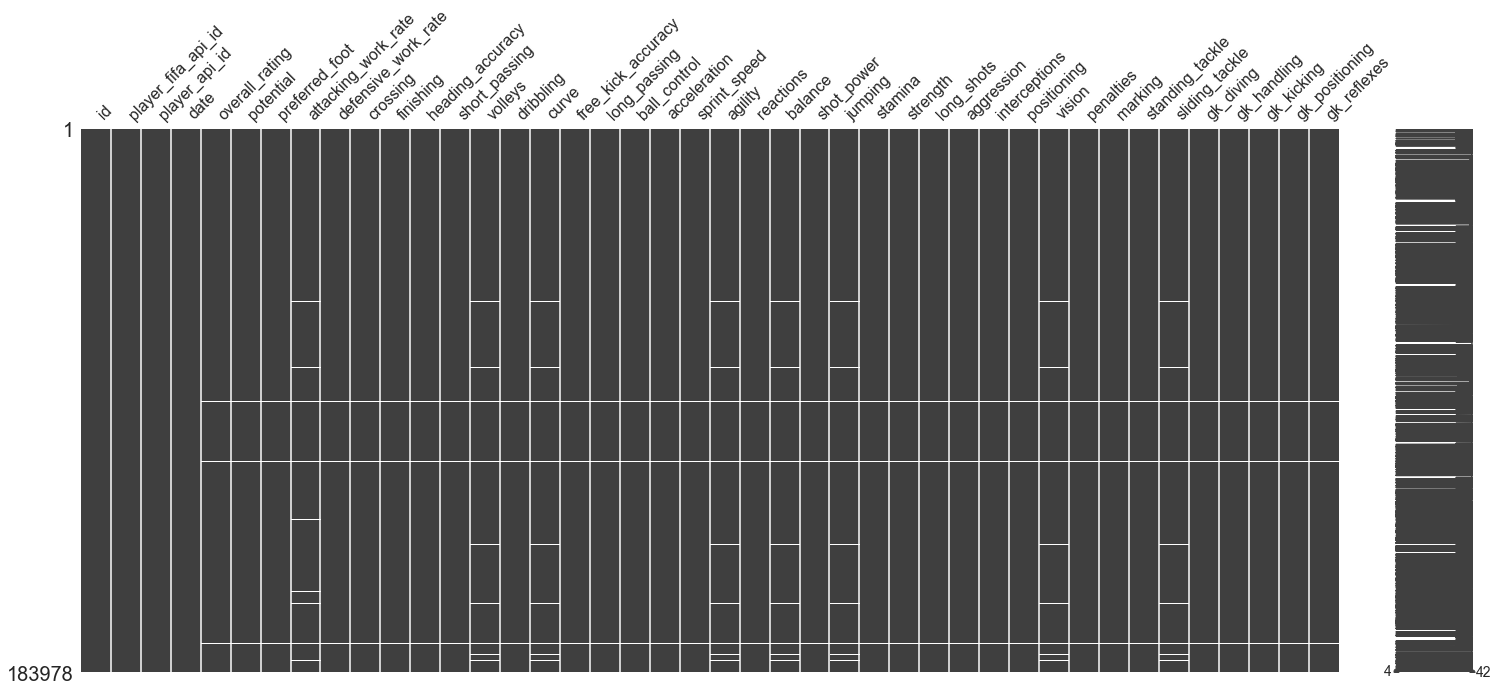

<IPython.core.display.Javascript object>

In [1000]:
msno.matrix(player_attributes_data)

In [1001]:
# converting date columns to date format
player_attributes_data["date"] = pd.to_datetime(player_attributes_data["date"])

<IPython.core.display.Javascript object>

In [1002]:
# dropping unnecessary columns
player_attributes_data.drop(columns=["player_fifa_api_id", "id"], inplace=True)

<IPython.core.display.Javascript object>

The main feature used for further analysis will be *overall rating*.
<br>
<br>**Overall rating**
<br>There are six main criteria which appear alongside the overall score: speed, shooting, passing, defending, dribbling and physicality. A score for each of these criteria is assigned to every player, and these are used to help calculate an overall rating out of 100. 
Each players 10-15 coefficient stats differ from players who do not play the same role as him.
Coefficients have different weight, also.

In [1003]:
# dropping rows with null overall rating values
player_attributes_data = player_attributes_data[
    player_attributes_data["overall_rating"].notnull()
]

<IPython.core.display.Javascript object>

In [1004]:
pd.DataFrame(player_attributes_data["overall_rating"].describe()).T

,count,mean,std,min,25%,50%,75%,max
overall_rating,183142.0,68.600015,7.041139,33.0,64.0,69.0,73.0,94.0


<IPython.core.display.Javascript object>

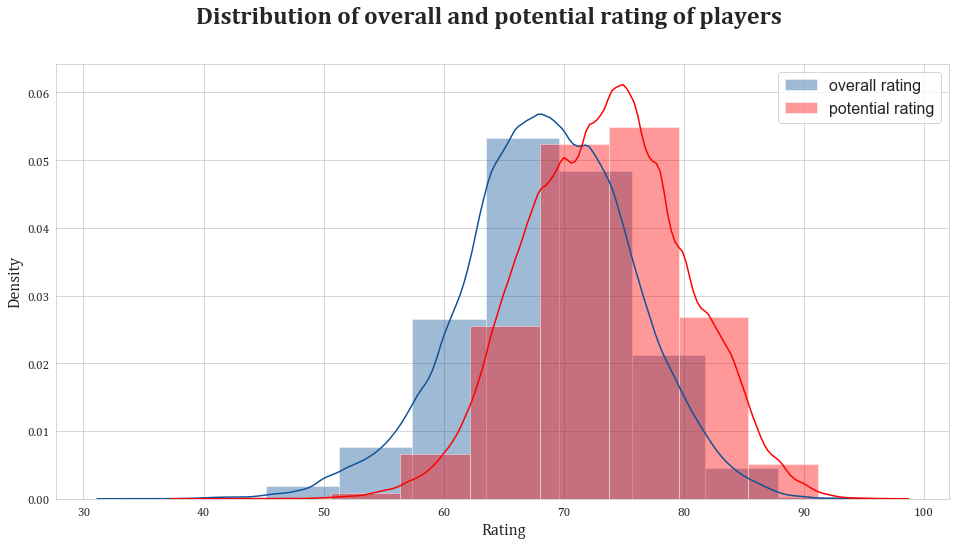

<IPython.core.display.Javascript object>

In [1005]:
f, ax = plt.subplots(sharey=True, figsize=(16, 8))

f.suptitle(
    "Distribution of overall and potential rating of players",
    fontsize=24,
    weight="bold",
    fontname=font,
)

sns.distplot(
    player_attributes_data["overall_rating"],
    hist=True,
    kde=True,
    bins=10,
    color=color,
    label="overall rating",
)
sns.distplot(
    player_attributes_data["potential"],
    hist=True,
    kde=True,
    bins=10,
    color="r",
    label="potential rating",
)

ax.set_ylabel("Density", fontsize=16, fontname=font)
ax.set_xlabel("Rating", fontname=font, fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=12, fontname=font)
plt.setp(ax.get_yticklabels(), fontsize=12, visible=True, fontname=font)

ax.legend(fontsize=16)
mpl.rc("font", family=font)

Overall score has pretty vide range again with minimum being 33 and maximum being 94 points. Most of soccer players have score between 64 and 73 points, with average being 68.6 points.

In [1006]:
avg_diff_rating = round(
    (
        player_attributes_data["potential"] - player_attributes_data["overall_rating"]
    ).mean(),
    2,
)

print("Average difference between potential and actual rating: ", avg_diff_rating)

Average difference between potential and actual rating:  4.86


<IPython.core.display.Javascript object>

#### Top 3  players
<br> best overall score by season 

In [1007]:
rating_data = ddb.query(
    """SELECT p.player_api_id,
                    p.player_name,
                    patt.overall_rating,
                    EXTRACT(year FROM patt.date::timestamp) AS date
                    FROM player_attributes_data AS patt
                    JOIN player_data AS p ON patt.player_api_id == p.player_api_id"""
).to_df()

rating_data = (
    rating_data.groupby(["date", "player_name"])
    .agg(max_rating=("overall_rating", "max"))
    .reset_index()
)
rating_data = (
    rating_data.sort_values(["date", "max_rating"], ascending=False)
    .groupby("date")
    .head(3)
)

# for displaying years in different colors
idx = pd.IndexSlice
dates = rating_data["date"].unique()
dates1 = dates[::2]
slice1 = rating_data.index.get_level_values(0).where(rating_data["date"].isin(dates1))
subset1 = rating_data[rating_data.index == slice1].index.get_level_values(0)

rating_data.style.set_properties(
    **{"background-color": "#EBE5E5"}, subset=idx[subset1, :]
)

,date,player_name,max_rating
69741,2016,Manuel Neuer,90.000000
70431,2016,Neymar,90.000000
66981,2016,Arjen Robben,89.000000
63180,2015,Lionel Messi,94.000000
60415,2015,Cristiano Ronaldo,93.000000
59732,2015,Arjen Robben,90.000000
55658,2014,Lionel Messi,94.000000
52782,2014,Cristiano Ronaldo,92.000000
52068,2014,Arjen Robben,90.000000
47945,2013,Lionel Messi,94.000000


<IPython.core.display.Javascript object>

It was decided to explore if there is a connection between player's physical parameters (using BMI) and overall rating:
<br>Data from 2016 was used.

In [1008]:
plr_att2016 = player_attributes_data[["player_api_id", "overall_rating"]].where(
    player_attributes_data["date"] >= "2016"
)
plr_att2016 = plr_att2016.dropna()
plr_att2016["player_api_id"] = plr_att2016["player_api_id"].astype("int64")
plr_att2016 = plr_att2016.merge(player_data, on="player_api_id").drop(
    columns=["player_api_id", "player_name", "birthday", "height", "weight"]
)

<IPython.core.display.Javascript object>

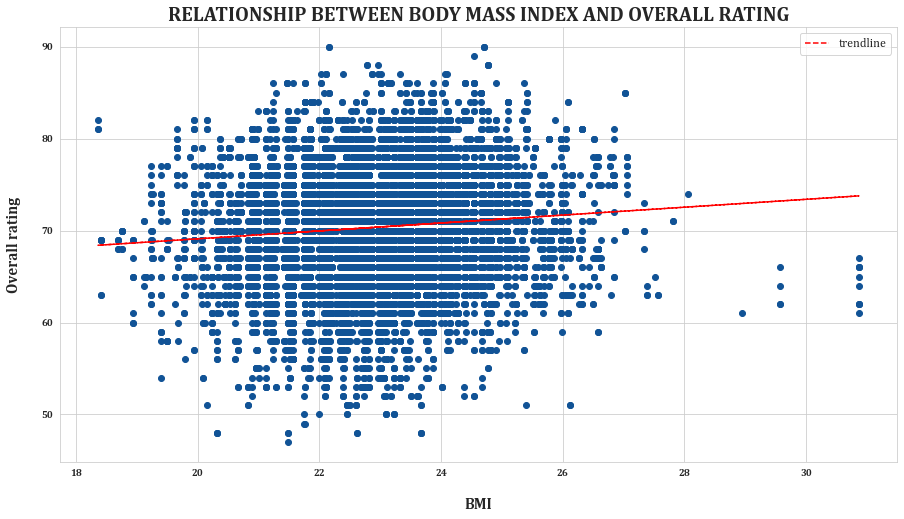

<IPython.core.display.Javascript object>

In [1009]:
x = plr_att2016["BMI"]
y = plr_att2016["overall_rating"]

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x, y, color=color)

# display of trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", label="trendline")

# parameters of plot
plt.xlabel("BMI", size=15, labelpad=20, fontweight="bold", fontname=font)
plt.ylabel("Overall rating", size=15, labelpad=20, fontweight="bold", fontname=font)
plt.title(
    "RELATIONSHIP BETWEEN BODY MASS INDEX AND OVERALL RATING",
    size=20,
    weight="bold",
    fontname=font,
)
plt.yticks(fontweight="bold", fontname=font)
plt.xticks(fontweight="bold", fontname=font)

# legend
ax.legend(fontsize=12)

It may be seen that there is almost no linear relationship between BMI and overall score of the player.

#### Q4. Is there such a thing as home advantage?

In [1010]:
home_away_goals = match_data.loc[:, ["home_team_goal", "away_team_goal"]]

home_away_goals.head()

,home_team_goal,away_team_goal
0,1,1
1,0,0
2,0,3
3,5,0
4,1,3


<IPython.core.display.Javascript object>

In [1011]:
conditions = [
    (home_away_goals["home_team_goal"] > home_away_goals["away_team_goal"]),
    (home_away_goals["home_team_goal"] == home_away_goals["away_team_goal"]),
    (home_away_goals["home_team_goal"] < home_away_goals["away_team_goal"]),
]

values = [1, -1, 0]

home_away_goals["win"] = np.select(conditions, values)

tie = len(home_away_goals[home_away_goals["win"] == -1])
home_win = len(home_away_goals[home_away_goals["win"] == 1])
away_win = len(home_away_goals[home_away_goals["win"] == 0])
total_games = len(home_away_goals)

print(
    f"""Total number of games in the dataset: {total_games}.
{home_win} of games ({round(home_win/total_games*100, 2)}%) were won by home team.
{away_win} of games ({round(away_win/total_games*100, 2)}%) were won by guest team.
{tie} of games ({round(tie/total_games*100, 2)}%) ended in tie."""
)

Total number of games in the dataset: 25979.
11917 of games (45.87%) were won by home team.
7466 of games (28.74%) were won by guest team.
6596 of games (25.39%) ended in tie.


<IPython.core.display.Javascript object>

#### HYPOTHESIS TESTING

**HYPOTHESIS 0** - There is no significant difference in proportions of soccer games outcomes.
<br>$H_0$: $p_1$=$p_2$=$p_3$

<br>**HYPOTHESIS 1** - There is a significant difference in proportions of soccer games outcomes.
<br>$H_1$: $p_1$≠$p_2$≠$p_3$

<br>**Significance level is 5%.**
<br>**α = 0.05**

In [1012]:
chi_squared_stats, p_value = chisquare([45.87, 28.74, 25.39], [33.33, 33.33, 33.33])

alpha = 0.05

print(f"Chi\N{SUPERSCRIPT TWO}-statistics value: {round(chi_squared_stats, 3)}")
print(f"P-value: {round(p_value, 3)}")

if p_value > alpha:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

Chi²-statistics value: 7.242
P-value: 0.027
We reject the null hypothesis.


<IPython.core.display.Javascript object>

To conclude, from the data given it was established that a statistically significant part of games were won by team playing at home, which indicates that there is home advantage in soccer.

***********************
### CREATING STATISTICAL MODELS
******************************

#### Data preparation for modeling

It was decided to use features from table *Match* and *Player attributes* for modeling.
<br>*Match* table contained data from betting companies, which might be useful when predicting the outcome of the game.

In [1013]:
match_data[
    [
        "B365H",
        "B365D",
        "B365A",
        "BWH",
        "BWD",
        "BWA",
        "IWH",
        "IWD",
        "IWA",
        "LBH",
        "LBD",
        "LBA",
        "PSH",
        "PSD",
        "PSA",
        "WHH",
        "WHD",
        "WHA",
        "SJH",
        "SJD",
        "SJA",
        "VCH",
        "VCD",
        "VCA",
        "GBH",
        "GBD",
        "GBA",
        "BSH",
        "BSD",
        "BSA",
    ]
].head()

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


<IPython.core.display.Javascript object>

Checking for missing data in betting data columns:

In [1014]:
# checking data from betting companies
pd.DataFrame(round(match_data[['B365H', 'B365D','B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
            'PSH','PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA',
            'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']].isnull().mean(), 3)).T


,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,0.13,0.13,0.13,0.131,0.131,0.131,0.133,0.133,0.133,0.132,...,0.342,0.131,0.131,0.131,0.455,0.455,0.455,0.455,0.455,0.455


<IPython.core.display.Javascript object>

It was decided to use columsn *B365H, B365A, B365D*, which contains data from highest valued gabling company worldwide **bet365** as it has the lowest proportion of missing data.

In [1015]:
# choosing columns from match table, which will be used for modelling

columns = [
    "id",
    "date",
    "match_api_id",
    "home_team_api_id",
    "away_team_api_id",
    "home_team_goal",
    "away_team_goal",
    "B365H",
    "B365D",
    "B365A",
]
home_players = ["home_player_" + str(i) for i in range(1, 12)]
away_players = ["away_player_" + str(i) for i in range(1, 12)]

columns = columns + home_players + away_players
players = home_players + away_players

<IPython.core.display.Javascript object>

In [1016]:
# creating new data frame with chosen columns from table match
new_match = match_data[columns]
new_match["date"] = pd.to_datetime(new_match["date"])
new_match = new_match.dropna()
new_match = new_match.sort_values(by="date")

<IPython.core.display.Javascript object>

In [1017]:
# choosing columns from table Player attributes
players_att_columns = ["player_api_id", "date", "overall_rating"]

<IPython.core.display.Javascript object>

In [1018]:
# creating new data frame with chosen columns form table player attributes
new_player_attributes = player_attributes_data[players_att_columns]
new_player_attributes = new_player_attributes.dropna()
new_player_attributes = new_player_attributes.sort_values(by="date")

<IPython.core.display.Javascript object>

In [1019]:
# merging data into one table

for player in players:
    new_match[player] = new_match[player].astype("int64")
    player_rating = new_player_attributes.rename(
        columns={col: f"{col}_{player}" for col in players_att_columns[1:]}
    )

    new_match = pd.merge_asof(
        new_match,
        player_rating,
        left_by=[player],
        right_by=["player_api_id"],
        left_on=["date"],
        right_on=[f"date_{player}"],
        allow_exact_matches=False,
    )

    new_match = new_match.drop([f"date_{player}", player, "player_api_id"], axis=1)

new_match.head()

,id,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,...,overall_rating_away_player_2,overall_rating_away_player_3,overall_rating_away_player_4,overall_rating_away_player_5,overall_rating_away_player_6,overall_rating_away_player_7,overall_rating_away_player_8,overall_rating_away_player_9,overall_rating_away_player_10,overall_rating_away_player_11
0,4770,2008-08-09,483130,9827,7819,2,1,1.57,3.6,6.50,...,67.0,71.0,67.0,66.0,76.0,71.0,70.0,67.0,77.0,58.0
1,4774,2008-08-09,483134,9829,9847,1,0,2.40,3.1,3.10,...,71.0,51.0,77.0,78.0,75.0,75.0,85.0,82.0,61.0,70.0
2,4775,2008-08-09,483135,8481,8639,0,0,2.15,3.1,3.60,...,70.0,78.0,56.0,77.0,76.0,73.0,76.0,79.0,77.0,69.0
3,4777,2008-08-09,483137,9874,9855,1,2,1.91,3.2,4.33,...,65.0,56.0,68.0,60.0,57.0,59.0,74.0,67.0,79.0,60.0
4,4778,2008-08-09,483138,9873,9853,1,0,2.40,3.1,3.10,...,81.0,73.0,77.0,76.0,74.0,76.0,75.0,72.0,72.0,81.0


<IPython.core.display.Javascript object>

In [1020]:
# creating column 'outcome' containing information about the end of the match
# home win -> 1
# guest win -> 0
# tie -> -1


conditions = [
    (new_match["home_team_goal"] > new_match["away_team_goal"]),
    (new_match["home_team_goal"] == new_match["away_team_goal"]),
    (new_match["home_team_goal"] < new_match["away_team_goal"]),
]


values = [1, -1, 0]

new_match["outcome"] = np.select(conditions, values)

<IPython.core.display.Javascript object>

In [1021]:
# calculating average rating of player in each team
new_match["home_team_avg_rating"] = new_match[
    ["overall_rating_" + player for player in home_players]
].mean(axis=1)
new_match["away_team_avg_rating"] = new_match[
    ["overall_rating_" + player for player in away_players]
].mean(axis=1)

<IPython.core.display.Javascript object>

In [1022]:
new_match["home_team_avg_rating"] = round(new_match["home_team_avg_rating"], 2)
new_match["away_team_avg_rating"] = round(new_match["away_team_avg_rating"], 2)

<IPython.core.display.Javascript object>

In [1023]:
new_match.head()

,id,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,...,overall_rating_away_player_5,overall_rating_away_player_6,overall_rating_away_player_7,overall_rating_away_player_8,overall_rating_away_player_9,overall_rating_away_player_10,overall_rating_away_player_11,outcome,home_team_avg_rating,away_team_avg_rating
0,4770,2008-08-09,483130,9827,7819,2,1,1.57,3.6,6.50,...,66.0,76.0,71.0,70.0,67.0,77.0,58.0,1,74.45,69.45
1,4774,2008-08-09,483134,9829,9847,1,0,2.40,3.1,3.10,...,78.0,75.0,75.0,85.0,82.0,61.0,70.0,1,67.91,73.36
2,4775,2008-08-09,483135,8481,8639,0,0,2.15,3.1,3.60,...,77.0,76.0,73.0,76.0,79.0,77.0,69.0,-1,69.82,72.45
3,4777,2008-08-09,483137,9874,9855,1,2,1.91,3.2,4.33,...,60.0,57.0,59.0,74.0,67.0,79.0,60.0,0,69.55,65.09
4,4778,2008-08-09,483138,9873,9853,1,0,2.40,3.1,3.10,...,76.0,74.0,76.0,75.0,72.0,72.0,81.0,1,69.73,74.73


<IPython.core.display.Javascript object>

#### Predicting outcome of the game

In [1024]:
# data for predicting outcome
y = new_match["outcome"]

X_outcome0 = new_match.drop(
    [
        "id",
        "date",
        "match_api_id",
        "home_team_api_id",
        "away_team_api_id",
        "outcome",
        "home_team_goal",
        "away_team_goal",
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [1025]:
x_train, x_test, y_train, y_test = train_test_split(
    X_outcome0, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

#### Logistic regression

In [1026]:
# creating Logistic regression model using Standard Scaler as tranformer for dat
log_model = Pipeline(
    [("scaler", StandardScaler()), ("regression", LogisticRegressionCV())]
)

# fitting model on training set
model = log_model.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [1027]:
coef = log_model.score(x_test, y_test)
print(f"Regression coefficient: {round(coef, 3)}.")

intercept = model.named_steps["regression"].intercept_[0]
print(f"Intercept: {round(intercept, 3)}.")

results = (
    pd.DataFrame(model.named_steps["regression"].coef_, columns=x_test.columns).round(3)
).set_index(pd.Index(["tie", "away", "home"]))

results

Regression coefficient: 0.537.
Intercept: -0.161.


,B365H,B365D,B365A,overall_rating_home_player_1,overall_rating_home_player_2,overall_rating_home_player_3,overall_rating_home_player_4,overall_rating_home_player_5,overall_rating_home_player_6,overall_rating_home_player_7,...,overall_rating_away_player_4,overall_rating_away_player_5,overall_rating_away_player_6,overall_rating_away_player_7,overall_rating_away_player_8,overall_rating_away_player_9,overall_rating_away_player_10,overall_rating_away_player_11,home_team_avg_rating,away_team_avg_rating
tie,0.105,-0.211,0.148,0.015,0.019,0.044,0.011,0.02,-0.024,0.023,...,-0.012,0.006,-0.004,-0.012,0.005,0.005,-0.013,-0.054,0.007,-0.007
away,0.186,0.061,-0.370,0.032,-0.049,-0.038,-0.065,-0.04,-0.005,-0.025,...,0.057,0.021,-0.013,0.018,0.026,0.005,0.023,0.009,-0.026,0.019
home,-0.290,0.150,0.222,-0.047,0.030,-0.006,0.054,0.02,0.029,0.001,...,-0.045,-0.028,0.017,-0.006,-0.031,-0.010,-0.010,0.044,0.018,-0.012


<IPython.core.display.Javascript object>

In [1028]:
predictions = model.predict(x_test)

<IPython.core.display.Javascript object>

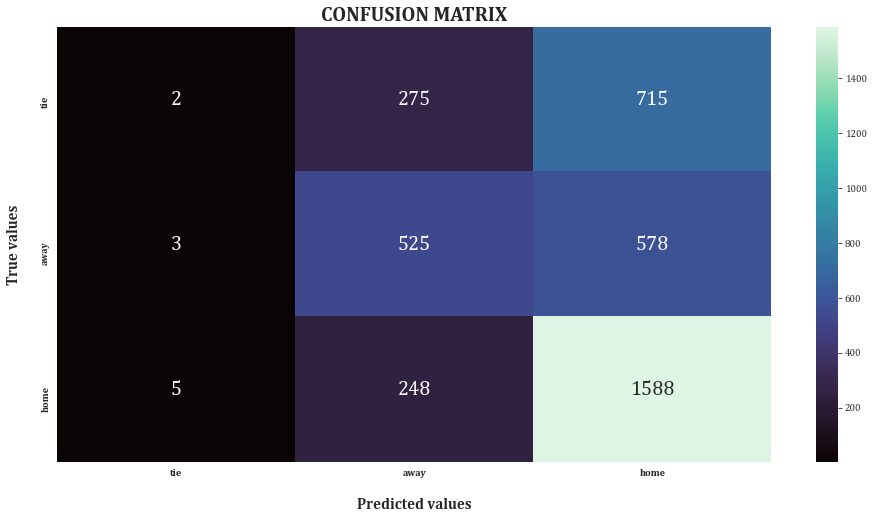

<IPython.core.display.Javascript object>

In [1029]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(
    data=confusion_matrix(y_test, predictions),
    annot=True,
    annot_kws={"fontsize": 20},
    fmt="g",
    cmap="mako",
)
plt.xlabel("Predicted values", size=15, labelpad=20, fontweight="bold")
plt.ylabel("True values", size=15, labelpad=20, fontweight="bold")
plt.title("CONFUSION MATRIX", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold")
ax.set_xticklabels(["tie", "away", "home"])
ax.set_yticklabels(["tie", "away", "home"])

It is clear that model is overpredicting home wins, it might be decided by the proportion of home wins we have seen before.

In [1030]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.20      0.00      0.00       992
           0       0.50      0.47      0.49      1106
           1       0.55      0.86      0.67      1841

    accuracy                           0.54      3939
   macro avg       0.42      0.45      0.39      3939
weighted avg       0.45      0.54      0.45      3939



<IPython.core.display.Javascript object>

Previous model was not very precise, for that reason it was decided to use different technique in order to predict the outcome of the match.

#### Support Vector Clasification

In [1031]:
x_train, x_test, y_train, y_test = train_test_split(
    X_outcome0, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [1032]:
# creating Logistic regression model using Standard Scaler as tranformer for dat
svc_model = Pipeline([("scaler", StandardScaler()), ("svm", SVC(probability=True))])

# fitting model on training set
model = svc_model.fit(x_train, y_train)
predictions = model.predict(x_test)

<IPython.core.display.Javascript object>

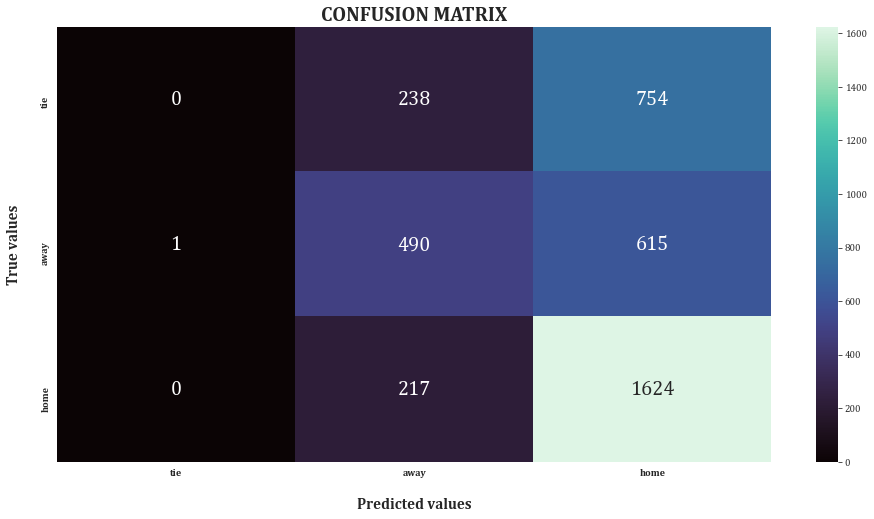

<IPython.core.display.Javascript object>

In [1033]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(
    data=confusion_matrix(y_test, predictions),
    annot=True,
    annot_kws={"fontsize": 20},
    fmt="g",
    cmap="mako",
)
plt.xlabel("Predicted values", size=15, labelpad=20, fontweight="bold")
plt.ylabel("True values", size=15, labelpad=20, fontweight="bold")
plt.title("CONFUSION MATRIX", size=20, weight="bold")
plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold")
ax.set_xticklabels(["tie", "away", "home"])
ax.set_yticklabels(["tie", "away", "home"])

In [1034]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       992
           0       0.52      0.44      0.48      1106
           1       0.54      0.88      0.67      1841

    accuracy                           0.54      3939
   macro avg       0.35      0.44      0.38      3939
weighted avg       0.40      0.54      0.45      3939



<IPython.core.display.Javascript object>

Results do not differ a lot from simple Logistic regression model.
<br>
<br>The purpose of modeling is to find right outcomes, which might be used for making bets. However, it may be difficult for a client to interpret technical terminology, so, I have decided to create function, which would calculate earnings if used model created.

#### Calculating profits of betting

In [1035]:
# actual outcome of games
outcome = pd.DataFrame(y)

# predictions of match outcome
guess = model.predict(X_outcome0)
guess = pd.DataFrame(list(guess)).rename(columns={0: "prediction"})

# data from betting companies
bets_data = X_outcome0[["B365H", "B365A", "B365D"]]

# merging data
bets = pd.merge(outcome, guess, left_index=True, right_index=True).merge(
    bets_data, left_index=True, right_index=True
)

<IPython.core.display.Javascript object>

In [1036]:
correct_bets = bets[bets["outcome"] == bets["prediction"]]

earnings = 0

bet = 10

for i in correct_bets.index:
    outcome = correct_bets.loc[i, "outcome"]

    if outcome == 1:
        earnings = earnings + bet * correct_bets.loc[i, "B365H"]

    elif outcome == 0:
        earnings = earnings + bet * correct_bets.loc[i, "B365A"]

    else:
        earnings = earnings + bet * correct_bets.loc[i, "B365D"]


print("Total earnings: ", round(float(earnings), 2))
print("Total bets: ", round(float(bet * len(bets)), 2))
print("Total profit: ", round(float(earnings - bet * len(bets)), 2))

Total earnings:  197290.0
Total bets:  196910.0
Total profit:  380.0


<IPython.core.display.Javascript object>

Although, I am over the moon that theoretically using my model would benefit clients, I would not recommend using it for betting purposes just yet. Hopefully, other modeling techniques will increase accuracy of the model.
<br>However, I believe that it is a great way to represent effectiveness of the model.

#### Predicting number of goals

In [1037]:
y = new_match[["home_team_goal", "away_team_goal"]]

X_goals = new_match.drop(
    [
        "id",
        "date",
        "match_api_id",
        "away_team_api_id",
        "home_team_api_id",
        "outcome",
        "home_team_goal",
        "away_team_goal",
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

It was decided to explore, how many goals fall in every category:

In [1038]:
htg = pd.DataFrame(y["home_team_goal"].value_counts())
atg = pd.DataFrame(y["away_team_goal"].value_counts())

team_goals = pd.merge(htg, atg, how="outer", left_index=True, right_index=True)

team_goals

,home_team_goal,away_team_goal
0,4434,6543.0
1,6341,6783.0
2,4830,3924.0
3,2500,1651.0
4,1068,560.0
5,349,165.0
6,125,52.0
7,30,7.0
8,8,5.0
9,4,1.0


<IPython.core.display.Javascript object>

Since, most of the goals fall into range from 0 to 5, it was decided to keep only this data.
<br>Other values will not be predicted, however, results would not be accurate anyway, because of small size of sample.

In [1039]:
drop_goals = y[(y["home_team_goal"] > 5) | (y["away_team_goal"] > 5)].index

y = y.drop(index=drop_goals)
X_goals = X_goals.drop(index=drop_goals)

<IPython.core.display.Javascript object>

In [1040]:
x_train, x_test, y_train, y_test = train_test_split(
    X_goals, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [1041]:
# creating svm model with multioutput
mlt_svc_model = Pipeline(
    [("scaler", StandardScaler()), ("svm", MultiOutputClassifier(SVC()))]
)

# fitting model on training set
model = mlt_svc_model.fit(x_train, y_train)
predictions = pd.DataFrame(model.predict(x_test))

<IPython.core.display.Javascript object>

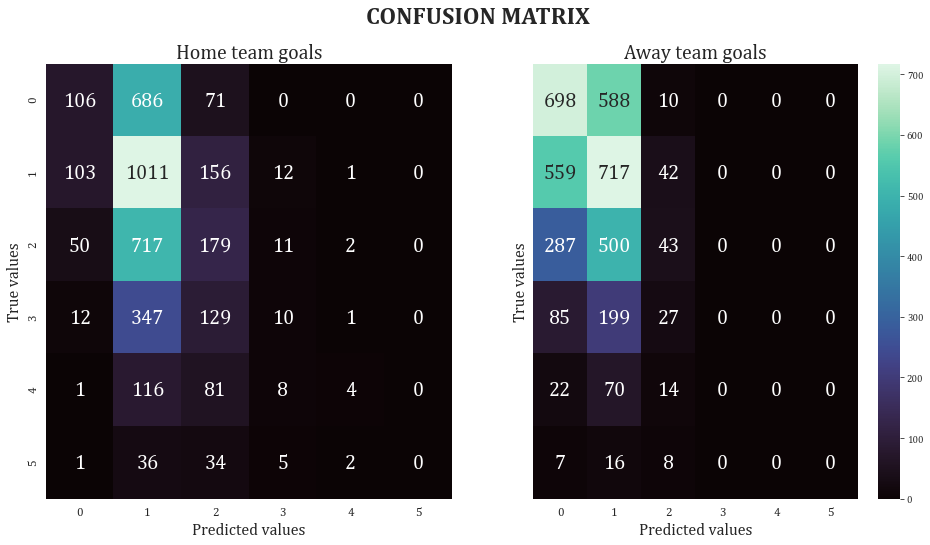

<IPython.core.display.Javascript object>

In [1042]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

fig.suptitle("CONFUSION MATRIX", fontsize=24, weight="bold", fontname=font)


sns.heatmap(
    data=confusion_matrix(y_test.iloc[:, 0], predictions.iloc[:, 0]),
    annot=True,
    annot_kws={"fontsize": 20},
    fmt="g",
    cmap="mako",
    ax=ax1,
    cbar=False,
)

ax1.set_title("Home team goals", fontsize=20, fontname=font)
ax1.set_ylabel("True values", fontsize=16, fontname=font)
ax1.set_xlabel("Predicted values", fontname=font, fontsize=16)
plt.setp(ax1.get_xticklabels(), fontsize=12, fontname=font)
plt.setp(ax1.get_yticklabels(), fontsize=12, visible=True, fontname=font)


sns.heatmap(
    data=confusion_matrix(y_test.iloc[:, 1], predictions.iloc[:, 1]),
    annot=True,
    annot_kws={"fontsize": 20},
    fmt="g",
    cmap="mako",
    ax=ax2,
)

ax2.set_title("Away team goals", fontsize=20, fontname=font)
ax2.set_ylabel("True values", fontsize=16, fontname=font)
ax2.set_xlabel("Predicted values", fontname=font, fontsize=16)
plt.setp(ax2.get_xticklabels(), fontsize=12, fontname=font)
plt.setp(ax2.get_yticklabels(), fontsize=12, visible=True, fontname=font)

In [1043]:
print("Home team goals")
print(classification_report(y_test.iloc[:, 0], predictions.iloc[:, 0]))

print("\n\nAway team goals")
print(classification_report(y_test.iloc[:, 1], predictions.iloc[:, 1]))

Home team goals
              precision    recall  f1-score   support

           0       0.39      0.12      0.19       863
           1       0.35      0.79      0.48      1283
           2       0.28      0.19      0.22       959
           3       0.22      0.02      0.04       499
           4       0.40      0.02      0.04       210
           5       0.00      0.00      0.00        78

    accuracy                           0.34      3892
   macro avg       0.27      0.19      0.16      3892
weighted avg       0.32      0.34      0.26      3892



Away team goals
              precision    recall  f1-score   support

           0       0.42      0.54      0.47      1296
           1       0.34      0.54      0.42      1318
           2       0.30      0.05      0.09       830
           3       0.00      0.00      0.00       311
           4       0.00      0.00      0.00       106
           5       0.00      0.00      0.00        31

    accuracy                           0.37

<IPython.core.display.Javascript object>

Model predicts score for each team separately.
<br>It may be seen that most of predictions fall into category of 0 and 1, since these were most frequent categories.
Model is not accurate, there are a lot of reasons for that - from wrong decision of features to modeling technique.

***************************************************************
### CONCLUSION
Main findings:
* Top players by scoring and overall rating coincide most of the time. Best players stay on top for quite some time.
* Players of soccer have wide range of physical features.
* Home advantage is real and it affects accuracy of models.
**************************************

### SUGGESTIONS FOR IMPROVEMTS
* Advanced analysis of content, i.e. synthesize data for quality categories of lower abundance.
* Introduce non linear models.
* Using additional features for modeling, i.e. from table of *Team attributes*.
* Gathering more data regarding accuracy of scoring.